Import & load dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [28]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(None, (145460, 23))

In [29]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [30]:
cate_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [31]:
df[cate_cols].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [32]:
df[cate_cols].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

cate_cols.remove('Date')

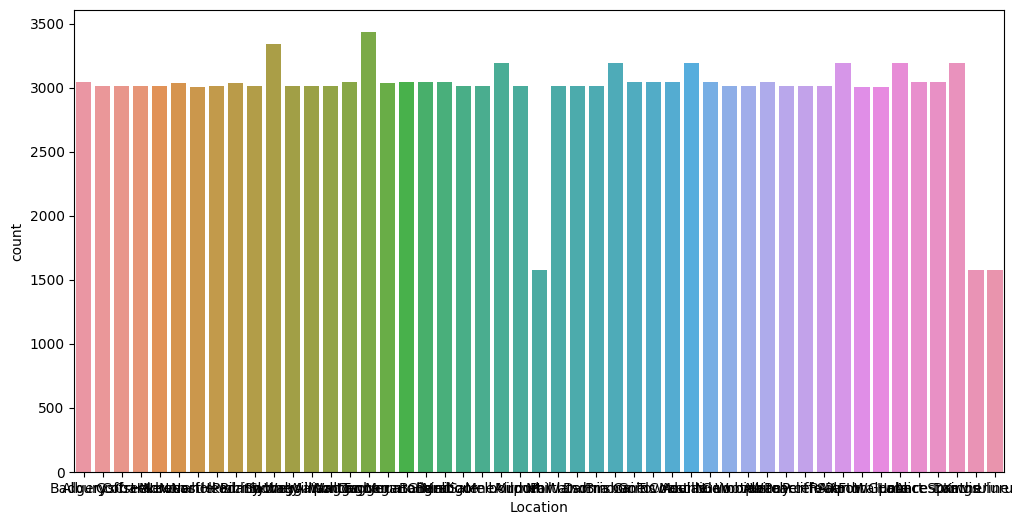

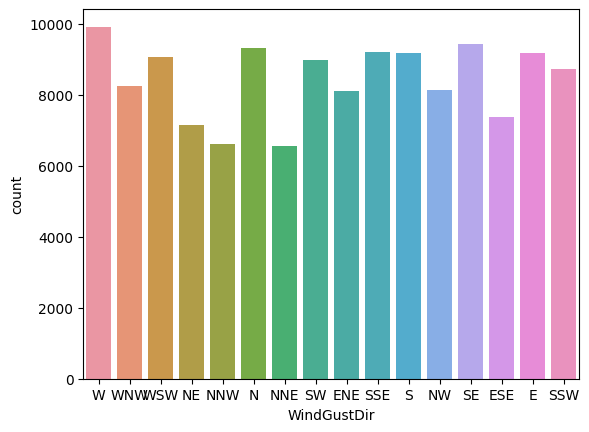

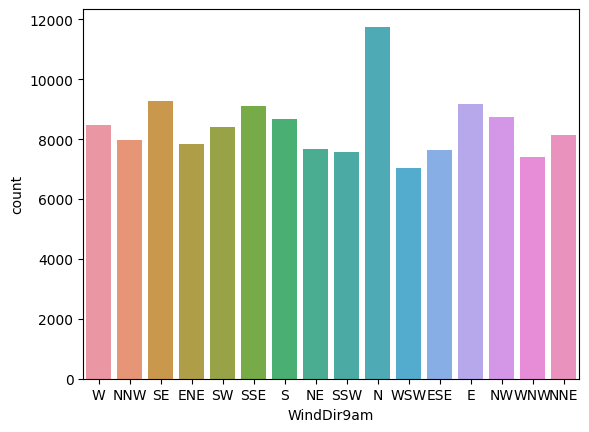

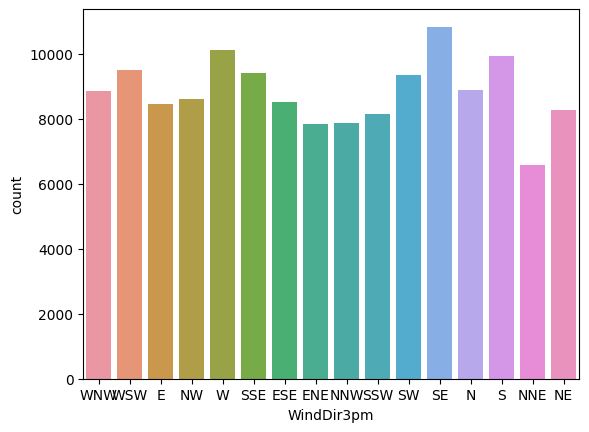

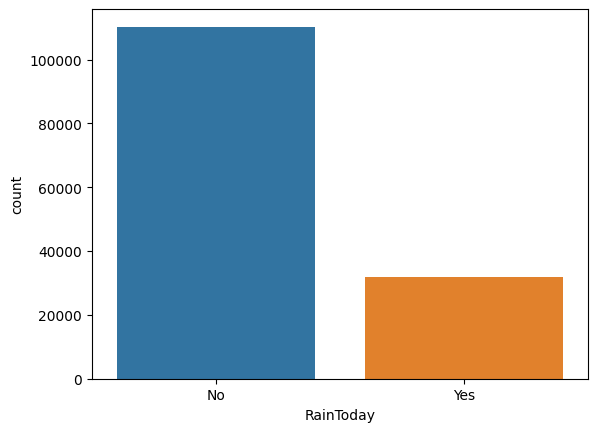

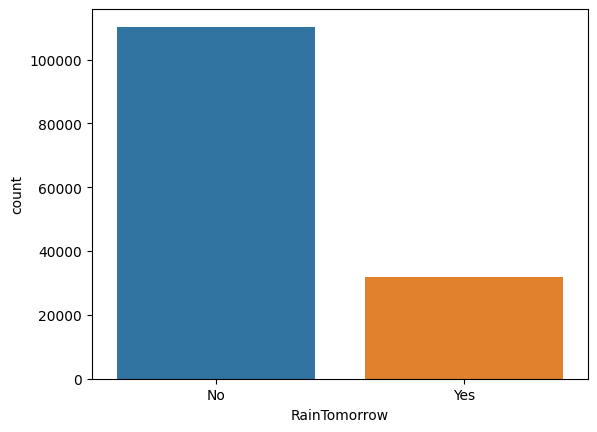

In [34]:
plt.figure(figsize=(12,6))
for col in cate_cols:
    sns.countplot(df, x=col)
    plt.show()

In [35]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [36]:
df[num_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

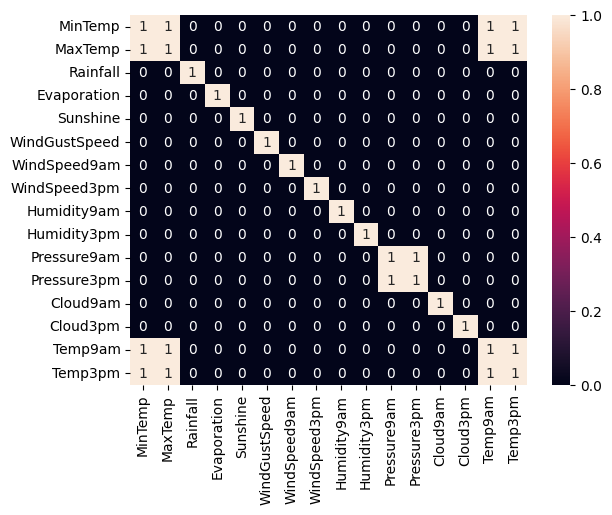

In [37]:
sns.heatmap(df[num_cols].corr() > 0.7 , fmt='d', annot=True)
plt.show()

In [38]:
num_cols_remove = ['MinTemp', 'Pressure9am', 'Temp9am']
for col in num_cols_remove:
    num_cols.remove(col)

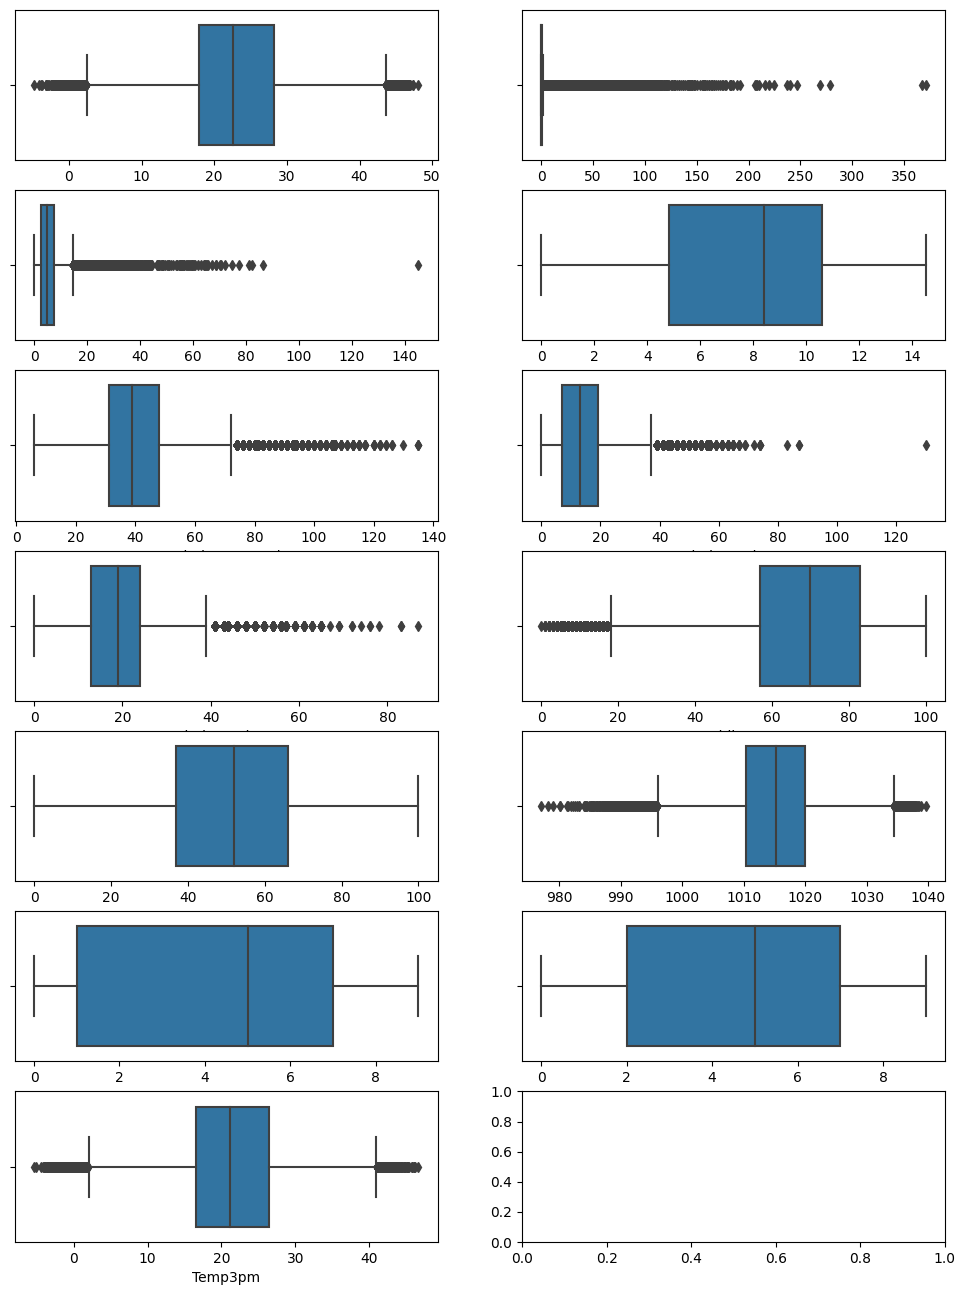

In [39]:
import math
fig, axs = plt.subplots(math.ceil(len(num_cols) / 2), 2, figsize=(12,16))
axs = axs.flat
for i, col in enumerate(num_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [40]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q1 + 1.5 * (Q3 - Q1)

df[num_cols] = np.where(df[num_cols] < lower_limit, Q1, df[num_cols])
df[num_cols] = np.where(df[num_cols] > lower_limit, Q3, df[num_cols])

In [41]:
num_cols_add = ['Year', 'Month', 'Day']
for col in num_cols_add:
    num_cols.append(col)
cate_cols.remove('RainTomorrow')

In [42]:
full_col = num_cols + cate_cols

df.dropna(subset='RainTomorrow', inplace=True)

In [43]:
y = df['RainTomorrow']
X = df[full_col].copy()

In [44]:
counts = df['RainTomorrow'].value_counts()
minority_class = counts['Yes']
majority_class = counts['No']

class_weights = {'Yes': 1.0, 'No': majority_class / minority_class}
majority_class/minority_class

3.4606769771308468

In [45]:
# val_counts = y.value_counts()
# total_samples = df.shape[0]

# class_weight = {}
# for class_label, counts in val_counts.items():
#     class_weight[class_label] = total_samples / (len(val_counts) * counts)
     
# print('Class weight:', class_weight)

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())
])

cate_transfomer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

processor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cate', cate_transfomer, cate_cols)
])

In [48]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lm = LogisticRegression(random_state=0, max_iter=1000)
lm.fit(X_train, y_train)
accuracies = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.24 %
Standard Deviation: 0.26 %


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [5, 20, 50],
    'max_depth': [None, 10, 20, 30]
}

rf = RandomForestClassifier(class_weight=class_weights, random_state=0)
grid_search_rf = GridSearchCV(rf, param_grid,cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

In [51]:
dt_model = RandomForestClassifier(**grid_search_rf.best_params_, random_state=0)
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, pred))

# Compute precision for the 'Yes' class
precision_yes = precision_score(y_test, pred, pos_label='Yes')
print('Precision for Yes:', precision_yes)

# Compute precision for the 'No' class
precision_no = precision_score(y_test, pred, pos_label='No')
print('Precision for No:', precision_no)

# Compute F1-score
precision_yes = f1_score(y_test, pred, pos_label='Yes')
print('Precision for Yes:', precision_yes)

# Compute precision for the 'No' class
precision_no = f1_score(y_test, pred, pos_label='No')
print('Precision for No:', precision_no)


NameError: name 'pred' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()